# Comparison of random number generators

In [9]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

N_SAMPLES = 2500000
BINS = 1000

### 1. Linear Congruential Generator

In [10]:
linear_congruential = pd.read_csv("data/linear_congruential.csv", nrows=N_SAMPLES)
linear_congruential.describe()

,Linear Congruential Numbers
count,2.500000e+06
mean,5.002209e-01
std,2.886486e-01
min,4.540198e-07
25%,2.501413e-01
50%,5.005147e-01
75%,7.504043e-01
max,9.999998e-01


### 2. Mersenne-Twister

In [11]:
mersenne_twister = pd.read_csv("data/mersenne_twister.csv", nrows=N_SAMPLES)
mersenne_twister.describe()

,Mersenne-Twister Numbers
count,2.500000e+06
mean,4.999295e-01
std,2.886727e-01
min,4.548247e-09
25%,2.499505e-01
50%,4.999436e-01
75%,7.499549e-01
max,9.999995e-01


### 3. True random numbers

In [12]:
true_random = pd.read_csv("data/true_random.csv", nrows=N_SAMPLES)
true_random.describe()

,True Random Numbers
count,2.500000e+06
mean,5.002662e-01
std,2.886752e-01
min,5.003546e-07
25%,2.505076e-01
50%,5.002900e-01
75%,7.502939e-01
max,1.000000e+00


In [13]:
true_random_set = set()

for num in true_random["True Random Numbers"]:
    if num in true_random_set:
        print("Duplicate found in true random numbers:", num)
        break

    true_random_set.add(num)

print("Unique true random numbers:", len(true_random_set))

Unique true random numbers: 2500000


### Histograms

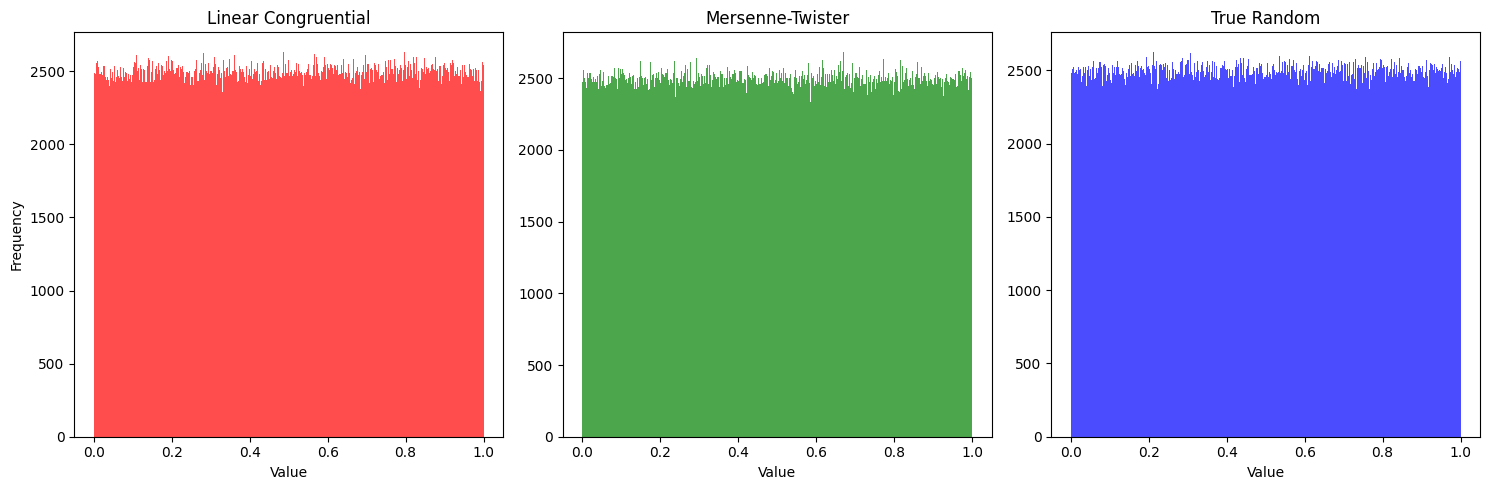

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(linear_congruential, bins=BINS, color="red", alpha=0.7)
plt.title("Linear Congruential")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(mersenne_twister, bins=BINS, color="green", alpha=0.7)
plt.title("Mersenne-Twister")
plt.xlabel("Value")

plt.subplot(1, 3, 3)
plt.hist(true_random, bins=BINS, color="blue", alpha=0.7)
plt.title("True Random")
plt.xlabel("Value")

plt.tight_layout()
plt.savefig("imgs/histogram.png")

### Student's t-Test

In [15]:
ttest = stats.ttest_ind(true_random, linear_congruential)
print(f"True Random vs Linear Congruential: t = {ttest.statistic[0]:.3f}, p = {ttest.pvalue[0]:.3f}")

ttest = stats.ttest_ind(true_random, mersenne_twister)
print(f"True Random vs Mersenne-Twister: t = {ttest.statistic[0]:.3f}, p = {ttest.pvalue[0]:.3f}")

ttest = stats.ttest_ind(linear_congruential, mersenne_twister)
print(f"Linear Congruential vs Mersenne-Twister: t = {ttest.statistic[0]:.3f}, p = {ttest.pvalue[0]:.3f}")

True Random vs Linear Congruential: t = 0.175, p = 0.861
True Random vs Mersenne-Twister: t = 1.304, p = 0.192
Linear Congruential vs Mersenne-Twister: t = 1.129, p = 0.259


### Chi-squared test

In [16]:
def chi2_uniform_test(data, bins=BINS):
    observed = np.histogram(data, bins=bins)[0]
    expected = np.full(bins, len(data)/bins)
    return stats.chisquare(observed, expected)

chi2_c = chi2_uniform_test(linear_congruential)
print(f"Linear Congruential: chi2 = {chi2_c.statistic:.3f}, p = {chi2_c.pvalue:.3f}")

chi2_mt = chi2_uniform_test(mersenne_twister)
print(f"Mersenne-Twister: chi2 = {chi2_mt.statistic:.3f}, p = {chi2_mt.pvalue:.3f}")

chi2_tr = chi2_uniform_test(true_random)
print(f"True Random: chi2 = {chi2_tr.statistic:.3f}, p = {chi2_tr.pvalue:.3f}")

Linear Congruential: chi2 = 958.071, p = 0.820
Mersenne-Twister: chi2 = 955.938, p = 0.832
True Random: chi2 = 924.628, p = 0.955


### Cauchy Distribution

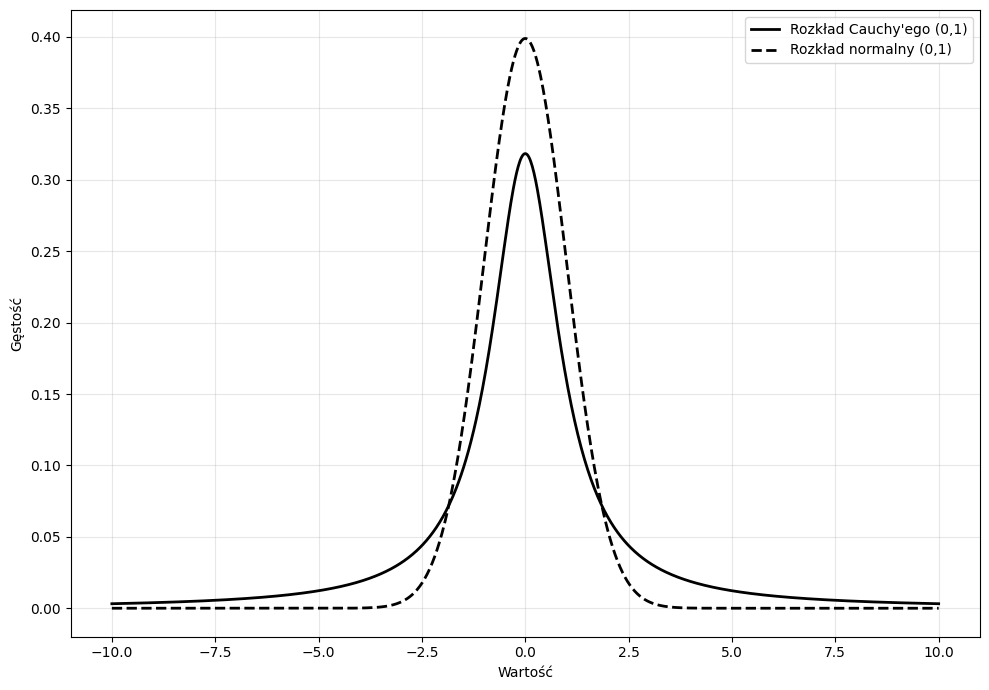

In [26]:
plt.figure(figsize=(10, 7))
x = np.linspace(-10, 10, 1000)

theoretical_cauchy = stats.cauchy.pdf(x, loc=0, scale=1)
plt.plot(x, theoretical_cauchy, 'k-', linewidth=2, label='Rozkład Cauchy\'ego (0,1)')

theoretical_gauss = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, theoretical_gauss, 'k--', linewidth=2, label='Rozkład normalny (0,1)')

plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.savefig("imgs/cauchy_distribution.png")
plt.show()